# Data Preprocessing

### Importing Data

In [1]:
import pandas as pd
data = pd.read_csv('BookPublishingData.csv')
data

,Publishing_Year,Book_Name,Author,Language_Code,Author_Rating,Book_Average_Rating,Book_Ratings_Count,Genre,Gross_Sales,Publisher_Revenue,Sale_Price,Sale_Rank,Publisher,Units_Sold
0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.50,7462.500,1.99,2,HarperCollins Publishers,6250
2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2014.0,Gray Mountain,John Grisham,eng,Intermediate,3.52,37379,nonfiction,104.94,62.964,0.99,1268,"Amazon Digital Services, Inc.",106
1066,1989.0,The Power of One,Bryce Courtenay,eng,Excellent,4.34,57312,genre fiction,846.94,508.164,7.99,1270,Random House LLC,106
1067,1930.0,The Maltese Falcon,Dashiell Hammett,eng,Intermediate,3.92,58742,genre fiction,846.94,508.164,7.99,1271,Hachette Book Group,106
1068,2011.0,Night Road,Kristin Hannah,en-US,Excellent,4.17,58028,genre fiction,104.94,62.964,0.99,1272,"Amazon Digital Services, Inc.",106


#### examining the data, we notice that there is duplication for a single book genre under two different names: "Fiction" and "Genre Fiction." To ensure this does not affect visualization and analysis processes, we must unify the genre name for the same type of book.

For further clarification, we will display the unique values of the "Genre" column

In [2]:
print(f"Unique values in the column 'Genre': {data['Genre'].unique()}")

Unique values in the column 'Genre': ['genre fiction' 'fiction' 'nonfiction' 'children']


### Data Cleaning

To unify the names using regex

In [3]:
import re
data['Genre'] = data['Genre'].apply(lambda x : re.sub('genre fiction', 'fiction', x))
# Check on unique values after unifying the names
print(f"Unique values in the column 'Genre' after unifying the names: {data['Genre'].unique()}")

Unique values in the column 'Genre' after unifying the names: ['fiction' 'nonfiction' 'children']


#### We also notice from the data that Publisher_Revenue is zero in some cases, which is illogical. Since the dataset is small and we need it in full, the most suitable decision we reached was to replace these values with 60% of the Gross_Sales.

In [4]:
data['Publisher_Revenue'] = data.apply(lambda x : x[9] if x[9] != 0 else x[8] * 0.6, axis=1)

C:\Users\m07am\AppData\Local\Temp\ipykernel_20452\788289624.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data['Publisher_Revenue'] = data.apply(lambda x : x[9] if x[9] != 0 else x[8] * 0.6, axis=1)


Check null values

In [5]:
data.isna().sum()

Publishing_Year         1
Book_Name              23
Author                  0
Language_Code          53
Author_Rating           0
Book_Average_Rating     0
Book_Ratings_Count      0
Genre                   0
Gross_Sales             0
Publisher_Revenue       0
Sale_Price              0
Sale_Rank               0
Publisher               0
Units_Sold              0
dtype: int64

<Axes: >

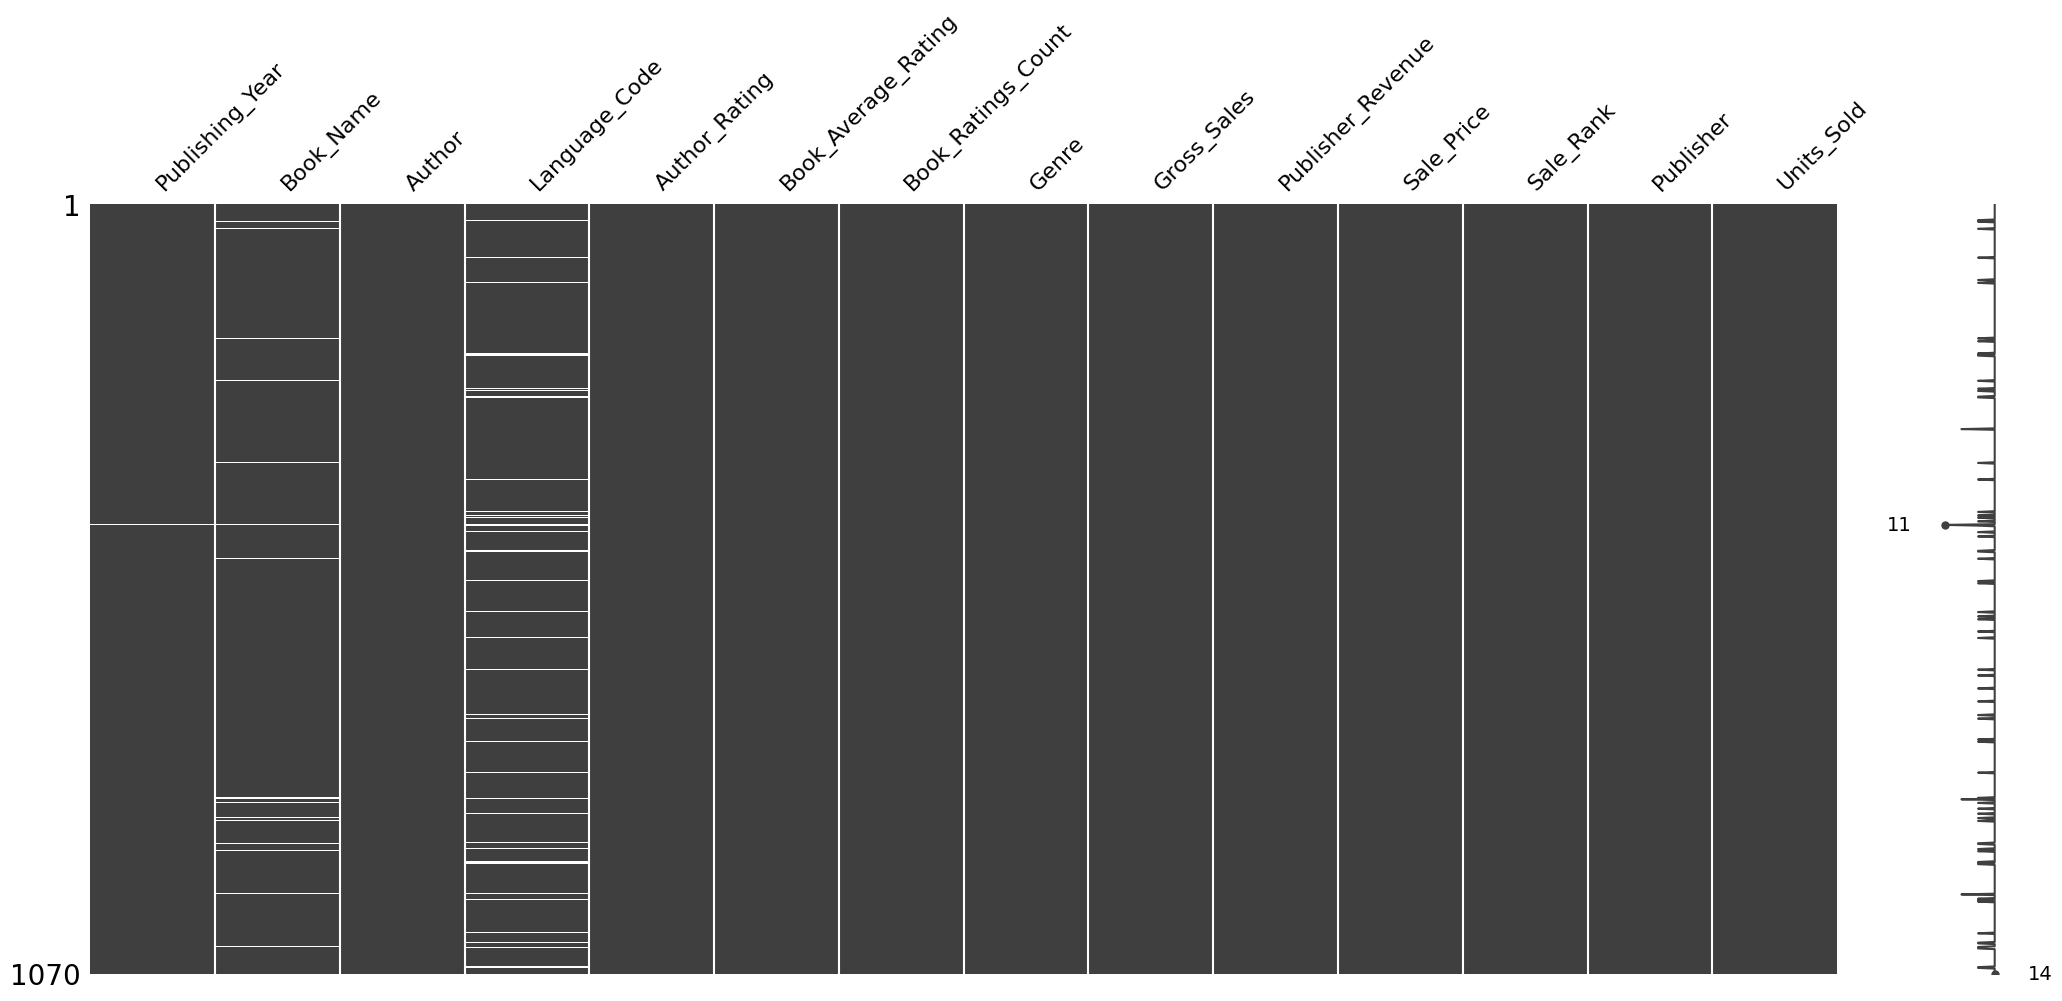

In [6]:
import missingno as msno
msno.matrix(data)

Check duplicates

In [7]:
print('\ntotal duplicated values = ', data.duplicated().sum())


total duplicated values =  0


### Droping Insuffecient Data

In [8]:
data.dropna(inplace=True)
data.shape

(998, 14)

In [9]:
data.isna().sum()

Publishing_Year        0
Book_Name              0
Author                 0
Language_Code          0
Author_Rating          0
Book_Average_Rating    0
Book_Ratings_Count     0
Genre                  0
Gross_Sales            0
Publisher_Revenue      0
Sale_Price             0
Sale_Rank              0
Publisher              0
Units_Sold             0
dtype: int64

There is no more Nulls

### Displaying Dataset Information

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 1069
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Publishing_Year      998 non-null    float64
 1   Book_Name            998 non-null    object 
 2   Author               998 non-null    object 
 3   Language_Code        998 non-null    object 
 4   Author_Rating        998 non-null    object 
 5   Book_Average_Rating  998 non-null    float64
 6   Book_Ratings_Count   998 non-null    int64  
 7   Genre                998 non-null    object 
 8   Gross_Sales          998 non-null    float64
 9   Publisher_Revenue    998 non-null    float64
 10  Sale_Price           998 non-null    float64
 11  Sale_Rank            998 non-null    int64  
 12  Publisher            998 non-null    object 
 13  Units_Sold           998 non-null    int64  
dtypes: float64(5), int64(3), object(6)
memory usage: 117.0+ KB


#### Convert Publishing Year Column to Integer

In [11]:
data['Publishing_Year'] = data['Publishing_Year'].apply(lambda x : int(x))
print(f"The data type of the 'Publishing_Year' column is: {data['Publishing_Year'].dtype}")

The data type of the 'Publishing_Year' column is: int64


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 1069
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Publishing_Year      998 non-null    int64  
 1   Book_Name            998 non-null    object 
 2   Author               998 non-null    object 
 3   Language_Code        998 non-null    object 
 4   Author_Rating        998 non-null    object 
 5   Book_Average_Rating  998 non-null    float64
 6   Book_Ratings_Count   998 non-null    int64  
 7   Genre                998 non-null    object 
 8   Gross_Sales          998 non-null    float64
 9   Publisher_Revenue    998 non-null    float64
 10  Sale_Price           998 non-null    float64
 11  Sale_Rank            998 non-null    int64  
 12  Publisher            998 non-null    object 
 13  Units_Sold           998 non-null    int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 117.0+ KB


### Data Description

In [13]:
data.describe(include='all')

,Publishing_Year,Book_Name,Author,Language_Code,Author_Rating,Book_Average_Rating,Book_Ratings_Count,Genre,Gross_Sales,Publisher_Revenue,Sale_Price,Sale_Rank,Publisher,Units_Sold
count,998.000000,998,998,998,998,998.000000,998.000000,998,998.00000,998.000000,998.000000,998.000000,998,998.000000
unique,NaN,996,698,8,4,NaN,NaN,3,NaN,NaN,NaN,NaN,9,NaN
top,NaN,Persepolis,Stephen King,eng,Intermediate,NaN,NaN,fiction,NaN,NaN,NaN,NaN,"Amazon Digital Services, Inc.",NaN
freq,NaN,2,27,725,589,NaN,NaN,827,NaN,NaN,NaN,NaN,566,NaN
mean,1971.070140,NaN,NaN,NaN,NaN,4.003056,95500.622244,NaN,1885.08515,1131.051090,4.839649,605.750501,NaN,9802.312625
std,190.019592,NaN,NaN,NaN,NaN,0.247360,31650.845116,NaN,4023.26877,2413.961262,3.585046,369.174705,NaN,15503.088302
min,-560.000000,NaN,NaN,NaN,NaN,2.970000,27308.000000,NaN,104.94000,62.964000,0.990000,1.000000,NaN,106.000000
25%,1985.000000,NaN,NaN,NaN,NaN,3.850000,70946.500000,NaN,370.88250,222.529500,1.990000,283.000000,NaN,555.000000
50%,2003.000000,NaN,NaN,NaN,NaN,4.010000,89901.000000,NaN,806.25000,483.750000,3.990000,591.500000,NaN,3915.000000
75%,2010.000000,NaN,NaN,NaN,NaN,4.170000,115596.000000,NaN,1492.96500,895.779000,6.990000,919.500000,NaN,5420.250000


### Outliers

In [14]:
import plotly.subplots as ps

temp = [i for i in data.columns if data[i].dtype != object]
fig = ps.make_subplots(cols=3, rows=3, subplot_titles=temp)

for i in range(1, 4):
    for j in range(1, 4):
        if len(temp):
            fig.add_box(x=data[temp.pop(0)], row=i, col=j, name='')

fig.update_layout(height=600, width=1500, title_text='Box Plot for Data Columns', title_x=0.5, showlegend=False)

fig.show()

### Removing Outliers

We'll Remove the Outliers in 'Publishing Year' Column Hence It Has Books Since BC

In [15]:
# Min, Max, Q1 10%, Q2 Median 50%, Q3 90%
print("Minimum Value = ", data['Publishing_Year'].min(), "| Maximum Value = ", data['Publishing_Year'].max())
print("Q1 = ", data['Publishing_Year'].quantile(0.1), "| Q2 = ", data['Publishing_Year'].median(), "| Q3 = ", data['Publishing_Year'].quantile(0.9))
# IQR = Q3 - Q1
iqr = data['Publishing_Year'].quantile(0.9) - data['Publishing_Year'].quantile(0.1)
print("IQR = ", iqr)

# Lower Bound = Q1 - 1.5 * IQR
lb = data['Publishing_Year'].quantile(0.1) - 1.5 * iqr
# Upper Bound = Q3 + 1.5 * IQR
ub = data['Publishing_Year'].quantile(0.9) + 1.5 * iqr

print("Lower Bound: ", lb)
print("Upper Bound: ", ub)

Minimum Value =  -560 | Maximum Value =  2016
Q1 =  1938.7 | Q2 =  2003.0 | Q3 =  2012.0
IQR =  73.29999999999995
Lower Bound:  1828.75
Upper Bound:  2121.95


In [16]:
import plotly.express as exp
exp.box(data_frame=data, x='Publishing_Year')

In [17]:
temp = data[(data['Publishing_Year'] < lb) | (data['Publishing_Year'] > ub)].shape[0]
print('Outliers Count =', temp)

Outliers Count = 20


In [18]:
# Filtering the  data using lower and upper bounds
data = data[~((data['Publishing_Year'] < lb) | (data['Publishing_Year'] > ub))]
data.shape[0]

978

### Exporting Data

In [19]:
data.to_csv('after_clean.csv')

# Statistics

### Books with the Highest Number of Sales

In [20]:
data.sort_values(by='Units_Sold', ascending=False).head(10)

,Publishing_Year,Book_Name,Author,Language_Code,Author_Rating,Book_Average_Rating,Book_Ratings_Count,Genre,Gross_Sales,Publisher_Revenue,Sale_Price,Sale_Rank,Publisher,Units_Sold
578,2009,New Moon: The Complete Illustrated Movie Compa...,Mark Cotta Vaz,en-US,Excellent,4.34,82399,fiction,1560.58,936.348,10.99,647,Penguin Group (USA) LLC,61560
579,2014,Maybe Someday,Colleen Hoover,eng,Excellent,4.33,81707,fiction,969.86,581.916,6.83,649,Random House LLC,61128
580,1999,Mr Maybe,Jane Green,eng,Novice,3.41,78132,fiction,562.59,337.554,3.99,651,"Amazon Digital Services, Inc.",61128
581,1915,Anne of the Island,L.M. Montgomery,eng,Excellent,4.21,97049,fiction,139.59,83.754,0.99,652,Random House LLC,60696
582,1883,Also sprach Zarathustra,"Friedrich Nietzsche, Walter Kaufmann",eng,Excellent,4.05,65362,fiction,1030.71,618.426,7.31,652,Penguin Group (USA) LLC,59400
583,1854,North and South,"Elizabeth Gaskell, Alan Shelston",eng,Excellent,4.13,95274,fiction,562.59,337.554,3.99,653,"Amazon Digital Services, Inc.",58968
584,2011,A Stolen Life,Jaycee Dugard,en-US,Intermediate,3.89,72713,fiction,558.60,335.160,3.99,655,"Amazon Digital Services, Inc.",57240
585,2010,The Immortals of Meluha,Amish Tripathi,eng,Intermediate,4.00,62784,fiction,418.60,251.160,2.99,658,"Amazon Digital Services, Inc.",56808
586,1995,The Lost World,Michael Crichton,eng,Intermediate,3.72,83389,fiction,1398.60,839.160,9.99,658,"Amazon Digital Services, Inc.",55728
587,2013,Requiem,Lauren Oliver,eng,Intermediate,3.74,100593,fiction,698.60,419.160,4.99,659,"Amazon Digital Services, Inc.",55080


### Books with the Highest Sales

In [21]:
data.sort_values(by='Gross_Sales', ascending=False).head(10)

,Publishing_Year,Book_Name,Author,Language_Code,Author_Rating,Book_Average_Rating,Book_Ratings_Count,Genre,Gross_Sales,Publisher_Revenue,Sale_Price,Sale_Rank,Publisher,Units_Sold
2,2015,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,fiction,47795.00,28677.000,8.69,3,"Amazon Digital Services, Inc.",5500
3,2008,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.00,24750.000,7.50,3,Hachette Book Group,5500
4,2011,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,fiction,37952.50,22771.500,7.99,4,Penguin Group (USA) LLC,4750
0,1975,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,fiction,34160.00,20496.000,4.88,1,HarperCollins Publishers,7000
6,2011,The Power of Habit,Charles Duhigg,eng,Intermediate,4.03,155977,fiction,27491.67,16495.002,6.99,6,HarperCollins Publishers,3933
26,1993,The Virgin Suicides,Jeffrey Eugenides,eng,Intermediate,3.83,159249,fiction,26904.06,16142.436,10.91,28,Penguin Group (USA) LLC,2466
7,1994,Midnight in the Garden of Good and Evil,John Berendt,eng,Intermediate,3.90,167997,nonfiction,26182.00,15709.200,6.89,8,Hachette Book Group,3800
8,2012,Hopeless,Colleen Hoover,eng,Intermediate,4.34,189938,fiction,26093.67,15656.202,6.99,9,HarperCollins Publishers,3733
9,1905,A Little Princess,"Frances Hodgson Burnett, Nancy Bond",eng,Intermediate,4.20,199872,fiction,23792.34,14275.404,6.49,10,Random House LLC,3666
14,1922,The Velveteen Rabbit,"Margery Williams Bianco, William Nicholson",eng,Intermediate,4.29,173469,fiction,21797.82,13078.692,6.54,15,Random House LLC,3333


### Books with the Highest Price

In [22]:
data.sort_values(by='Sale_Price',ascending=False).head(10)

,Publishing_Year,Book_Name,Author,Language_Code,Author_Rating,Book_Average_Rating,Book_Ratings_Count,Genre,Gross_Sales,Publisher_Revenue,Sale_Price,Sale_Rank,Publisher,Units_Sold
295,1908,The Wind in the Willows,"Kenneth Grahame, Gillian Avery",eng,Intermediate,3.98,124612,fiction,10327.30,6196.380,33.86,317,Penguin Group (USA) LLC,305
365,2003,We Need to Talk About Kevin,Lionel Shriver,eng,Excellent,4.07,101343,fiction,5902.92,3541.752,25.89,393,HarperCollins Publishers,6156
216,1995,Sabriel,Garth Nix,en-US,Intermediate,4.17,137047,fiction,8811.18,5286.708,19.98,235,Random House LLC,441
377,2006,The Tenth Circle,Jodi Picoult,eng,Novice,3.48,99170,fiction,3955.60,2373.360,17.98,409,"Amazon Digital Services, Inc.",5940
949,1983,Alanna: The First Adventure,Tamora Pierce,en-US,Excellent,4.27,85699,fiction,1867.80,1120.680,16.98,1119,Penguin Group (USA) LLC,4280
991,2009,Brooklyn,Colm TÃ³ibÃ­n,eng,Intermediate,3.63,55459,fiction,1659.96,995.976,15.37,1168,"Amazon Digital Services, Inc.",108
1049,1879,Et dukkehjem,"Henrik Ibsen, Michael Meyer",eng,Intermediate,3.69,69450,fiction,1588.94,953.364,14.99,1243,Hachette Book Group,106
158,2012,Beautiful Ruins,Jess Walter,eng,Intermediate,3.67,116053,fiction,9818.45,5891.070,14.99,169,Random House LLC,655
732,2011,Leviathan Wakes,James S.A. Corey,eng,Excellent,4.20,68416,nonfiction,1689.48,1013.688,14.44,840,HarperCollins Publishers,33048
707,2006,What Is the What: The Autobiography of Valenti...,Dave Eggers,eng,Excellent,4.16,59333,fiction,1680.32,1008.192,14.24,811,Penguin Group (USA) LLC,35424


### Books with the Highest Rating

In [23]:
data.sort_values(by='Book_Average_Rating', ascending=False).head(10)

,Publishing_Year,Book_Name,Author,Language_Code,Author_Rating,Book_Average_Rating,Book_Ratings_Count,Genre,Gross_Sales,Publisher_Revenue,Sale_Price,Sale_Rank,Publisher,Units_Sold
331,2014,Words of Radiance,Brandon Sanderson,eng,Famous,4.77,73572,fiction,741.52,444.912,2.99,354,HarperCollins Publishers,248
777,2016,A Court of Mist and Fury,Sarah J. Maas,eng,Famous,4.72,108384,fiction,1158.84,695.304,9.99,900,Simon and Schuster Digital Sales Inc,28512
479,1988,The Essential Calvin and Hobbes: A Calvin and ...,Bill Watterson,en-US,Famous,4.65,93001,fiction,166.32,99.792,0.99,530,"Amazon Digital Services, Inc.",4536
31,2010,The Way of Kings,Brandon Sanderson,eng,Famous,4.64,144822,fiction,2178.00,1306.800,0.99,32,"Amazon Digital Services, Inc.",2200
249,1987,Calvin and Hobbes,"Bill Watterson, G.B. Trudeau",en-US,Famous,4.61,117788,nonfiction,1886.22,1131.732,4.99,273,Penguin Group (USA) LLC,378
733,2015,Queen of Shadows,Sarah J. Maas,eng,Famous,4.60,99067,fiction,349.83,209.898,2.99,841,Macmillan,33048
433,1973,The Hobbit and The Lord of the Rings,J.R.R. Tolkien,eng,Famous,4.59,90907,fiction,184.14,110.484,0.99,477,"Amazon Digital Services, Inc.",5022
965,2000,A Storm of Swords: Part 2 Blood and Gold,George R.R. Martin,eng,Famous,4.56,54977,fiction,325.91,195.546,2.99,1140,"Amazon Digital Services, Inc.",4280
153,2013,The House of Hades,Rick Riordan,eng,Famous,4.54,159774,nonfiction,668.25,400.950,0.99,165,"Amazon Digital Services, Inc.",675
849,1986,The Complete Maus,Art Spiegelman,en-GB,Famous,4.53,76785,nonfiction,111.87,67.122,0.99,994,"Amazon Digital Services, Inc.",2862


### Authors with Most Published Books

In [24]:
data.groupby('Author')['Book_Name'].apply(len).sort_values(ascending=False).head(10)

Author
Stephen King                      27
Jim Butcher                       10
Charlaine Harris                  10
Nicholas Sparks                   10
John Grisham                       9
Jodi Picoult                       9
Lemony Snicket, Brett Helquist     8
Janet Evanovich                    8
J.R. Ward                          7
Terry Pratchett                    7
Name: Book_Name, dtype: int64